# <center> Introduction à la bioinformatique clinique </center> 

# <center> Exercise week 6: </center> 

# Image analysis - Preprocessing of Microscopic images - Part 1

In this exercise we will analyse 2 microscopic images of mouse lymphocytes. for the sake of simplicity the images that you will in the `RGB_images` folder are cropped from the original ones. 

The goal will be to automatically detect the cells in an image, distinguishing them from everything else. We will then use this information to quantify them.

Today, we will deal with the preprocessing of simple objects in an image. 

# A - Import packages

Before starting, we need to import the packages required to run the code.

The packages we use in this notebook are:

- [Numpy](https://numpy.org): Vector/matrix based calculations
- [Matplotlib](https://matplotlib.org): Plotting data
- [h5py](https://www.h5py.org): Read HDF5 file format

Install the missing packages:

In [ ]:
!pip install  scikit-image

In [18]:
#IMPORTS

#vectors and matrices
import numpy as np

#plotting
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('figure', figsize=(5,5))
import matplotlib.gridspec as gridspec



# B - Load and visualize images

In this section we show how to read an image from a file and display it within the notebook. We will work with 2 images.

## B1 - Load images

First we need to specify the folder and names of the files we want to open.  

Our images are stored in the RGB (Red Green Blue) format. We will read the RGB images and store them in a list called `RGB_images`.

In [19]:
#folder where the RGB images are stored
path_RGB_images = './RGB_images'

#generate the names of the images we want to read
img_names = [f'mouse_lymphocytes_{i}.jpg' for i in [1,2]]
# img_names = [f'Viability_{i}P_Starter.jpg' for i in [5,7]]



print(f'Image folder:\t {path_RGB_images}')
print('Image names:\t', img_names)

Image folder:	 ./RGB_images
Image names:	 ['mouse_lymphocytes_1.jpg', 'mouse_lymphocytes_2.jpg']


In [20]:
from skimage import io

#empty list that will contain all of our RGB images
RGB_images = [] 

# iterate on the image names
for img_name in img_names:
    
    # full path to the current image
    img_path = path_RGB_images + '/' + img_name

    # We import this image
    my_image = io.imread(img_path)

    #We store the image in the RGB_images list
    RGB_images.append(my_image)  

We can check the number of images loaded and the data shape and the data type of `RGB_images[0]` (image of index 0 in the list `RGB_images`)

In [21]:
# We check the number of images in images
print(f'Number of images in RGB_images:\t {len(RGB_images)}\n')

# We check the shape of the image 0
print(f'Data shape of RGB_images[0]:\t {RGB_images[0].shape}\n')

# We check the data type of the image 0
print(f'Data type RGB_images[0]:\t {type(RGB_images[0])}\n')

Number of images in RGB_images:	 2

Data shape of RGB_images[0]:	 (366, 366, 3)

Data type RGB_images[0]:	 <class 'numpy.ndarray'>



Each of the four RGB images has 1600 x 1600 x 3 = 7 680 000 pixels. 

In [22]:
print('Total pixels in RGB_images[0]:\t', RGB_images[0].size)

Total pixels in RGB_images[0]:	 401868


Each pixel has 3 color channels: Red, Blue, Green. One image can be represented as a 3 dimensional matrix:

dimension 0 = rows

dimension 1 = columns

dimension 2 = color channels



**1) Check that the shape and type of the image `RGB_images[1]` are the same as the ones of the image `RGB_images[0]` shown before.**

In [23]:
print(f'Data shape of RGB_images[1]:\t {RGB_images[1].shape}\n')

Data shape of RGB_images[1]:	 (366, 366, 3)



## B2 - Display RGB images

We can display images from matrices with the matplotlib function `plt.imshow()`.

When 3 RGB channels are detected in an image, `imshow()` by default interprets the first channel as RED, the second one as GREEN and the last one as BLUE.

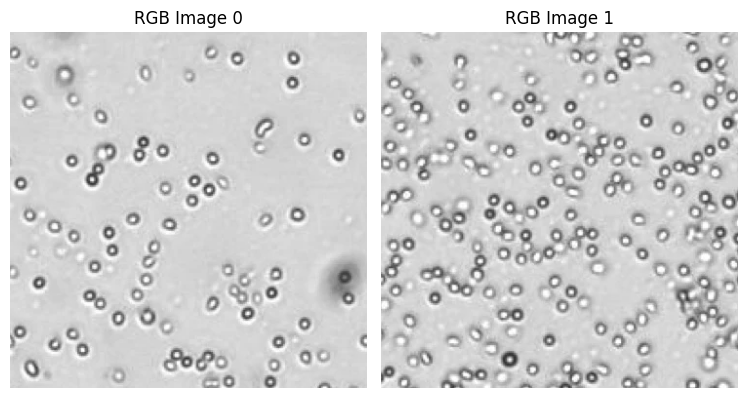

In [24]:
# Plot the RGB images for visualization
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 4)

for i, img in enumerate(RGB_images):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(img, cmap='gray')
    ax.set_title(f"RGB Image {i}")
    ax.axis('off')

plt.tight_layout()



## B3 - Images are just matrices (and viceversa)

Any image can be seen as a matrix (table) full of numbers, where every number is the color intensity at that specific pixel. Viceversa, every matric can also be seen as an image. This is usually a less useful perspective, but it helps build some better understanding of how an image is represented in a computer.

Hereafter we create a 3 by 3 matrix and we display it as an image with `imshow()`. Since it is a single 2D matrix we only have one color channel, i.e. the image is monochrome. We can choose what color those pixel intensities are referred to: if we set the color map to gray (`cmap='gray'`) we obtain a grayscale image, while if we change the color map to blue we obtain an image in blue shades. 

In the grayscale image, pixels values close to the minimum will be displayed as black, while the ones closer to the maximum pixel value will be displayed as white. 

In [8]:
# Define a 3x3 matrix
my_matrix = np.array([[0, 255, 50],
                      [205 ,75, 100],
                      [255, 230, 150]])

# print the matrix
print(my_matrix)

[[  0 255  50]
 [205  75 100]
 [255 230 150]]


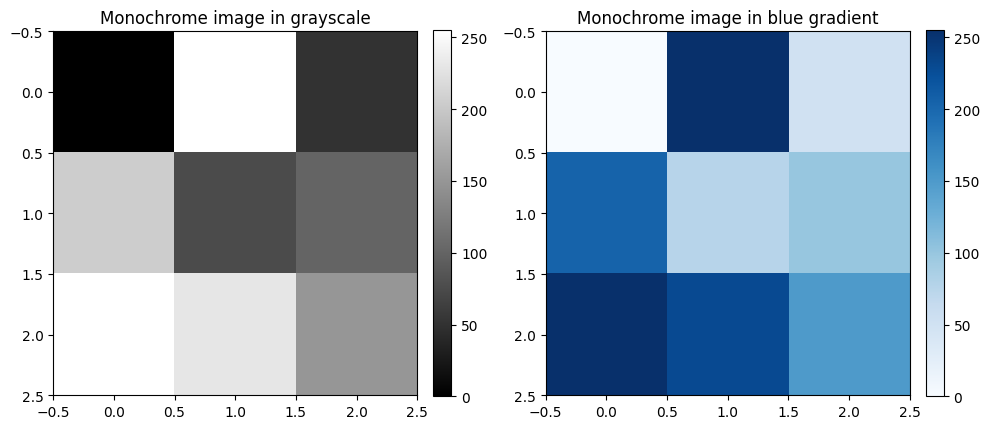

In [9]:
# Create one figure with two sub-figures (called "axes")
fig, axes = plt.subplots(nrows = 1,
                         ncols = 2,
                         figsize = (10, 5),
                         facecolor = 'w')


##################
# FIRST FIGURE
##################

# plot the matrix in grayscale 
img_grayscale = axes[0].imshow(my_matrix,
                               cmap = 'gray',
                               vmin = 0,
                               vmax = 255)

# plot the associated colorbar 
fig.colorbar(img_grayscale,
             ax = axes[0],
             fraction = 0.046,
             pad = 0.04)

# set a title
axes[0].set_title('Monochrome image in grayscale')



##################
# SECOND FIGURE
##################

# plot the matrix with a blue gradient 
img_blue_gradient = axes[1].imshow(my_matrix,
                                   cmap = 'Blues',
                                   vmin = 0,
                                   vmax = 255)

# plot the associated colorbar
fig.colorbar(img_blue_gradient,
             ax = axes[1],
             fraction = 0.046,
             pad = 0.04)

# set a title
axes[1].set_title('Monochrome image in blue gradient')



#optimise the distance between the two figures
fig.tight_layout();

## B4 - Split a RGB image into three monochrome images

To sum up, RGB images are 3D matrix of size n_row x n_column x 3 (= n_channels). The values in the matrices represent the intensity of each color (red, green and blue).

We can therefore split this 3D matrices into three 2D matrices of size n_row x n_column. Taken one at a time, these matrices represent monochromatic images, as the one shown in the simple example above. We can then plot these three matrices as three different images. Since we know that they correspond to red, green and blue channels, we will use `cmap='Reds'`,`cmap='Greens'` and `cmap='Blues'` respectively.

To access to the red channel of the first image (and thus to obtain a 2D matrix) we can do `RGBA_images[0][:, :, 0]`. This tells numpy we want all entries in the first axis (all rows), all entries in the second axis (all columns) and only entries in position 0 in the third axis (that is, the first channel).

In the same way, to access to the green channel of the first image we can do `RGBA_images[0][:, :, 1]` and to access to the blue channel of the first image we can do `RGBA_images[0][:, :, 2]`.

Below we plot the 3 channels independently.

In [10]:
# Select the index of the image to plot
index_RGB_image = 0

# Put this image in a variable my_image
my_image = RGB_images[index_RGB_image]

# Put the red channel in a variable red_channel
red_channel = my_image[:, :, 0]

# Put the green channel in a variable green_channel
green_channel = my_image[:, :, 1]

# Put the blue channel in a variable blue_channel
blue_channel = my_image[:, :, 2]

# my_image.shape[2] return the number of channel in my_image (=3)
number_of_channels = my_image.shape[2]

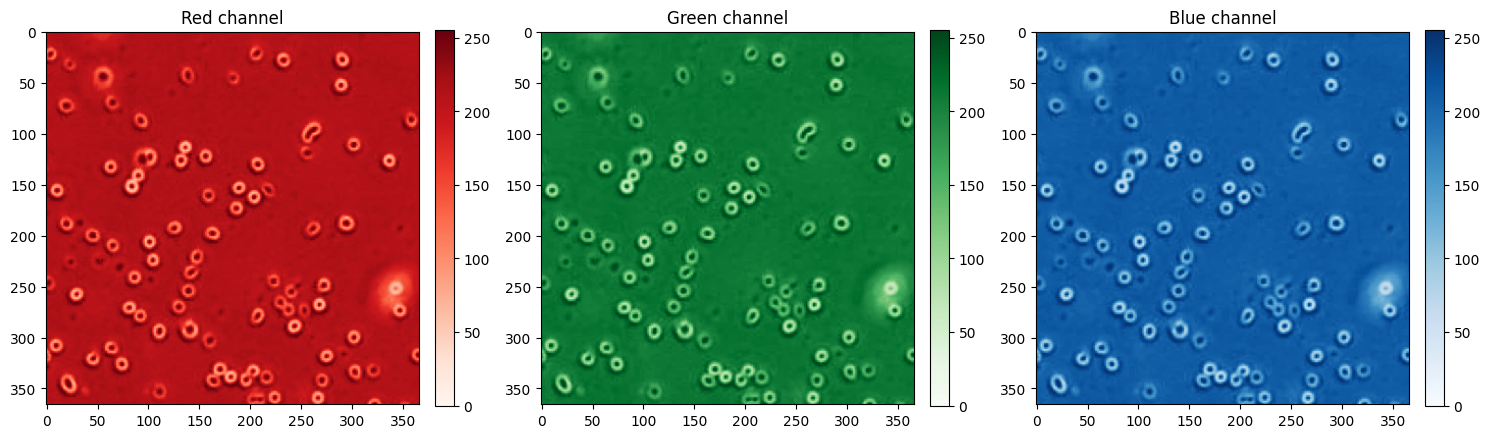

In [25]:
# Create 3 axes, one for each channel (red, green, blue)
fig, axes = plt.subplots(nrows = 1,
                         ncols = number_of_channels,
                         figsize = (15, 15),
                         facecolor = 'w')


##### FIRST CHANNEL (RED)

# on the 1st axis we will plot the red channel of the image cmap (color map) will modify the color of our figure
# with a gradient of Reds
red_channel_image = axes[0].imshow(red_channel,
                                   cmap = 'Reds',
                                   vmin = 0,
                                   vmax = 255)

# create a color bar in legend associated with red_image_plotted
fig.colorbar(red_channel_image,
             ax = axes[0],
             fraction = 0.046,
             pad = 0.04)

# Set a title to the first figure
axes[0].set_title('Red channel')



##### SECOND CHANNEL (GREEN)

# on the 2nd axis we will plot the green channel of the image cmap (color map) will modify the color of our figure
# with a gradient of Greens
green_channel_image = axes[1].imshow(green_channel,
                                     cmap = 'Greens',
                                     vmin=0,
                                     vmax=255)

# create a color bar in legend associated with green_image_plotted
fig.colorbar(green_channel_image,
             ax = axes[1],
             fraction = 0.046,
             pad = 0.04)

# Set a title to the 2nd figure
axes[1].set_title('Green channel')



##### THIRD CHANNEL (BLUE)

# on the 3rd axis we will plot the blue channel of the image cmap (color map) will modify the color of our figure
# with a gradient of Blues
blue_channel_image = axes[2].imshow(blue_channel,
                                    cmap = 'Blues',
                                    vmin = 0,
                                    vmax = 255)

# create a color bar in legend associated with blue_image_plotted
fig.colorbar(blue_channel_image,
             ax = axes[2],
             fraction = 0.046,
             pad = 0.04)

# Set a title to the 3rd figure
axes[2].set_title('Blue channel')


#####


#optimise the distance between the figures
fig.tight_layout()

**2) Split the channel of images[1] and plot the three associated graphs**

# D - Image Transformation

## D1 - Transform a RGB image into a grayscale image

To make the subsequent analysis easier, we can transform the RGB image (3D matrix, n_row x n_col x 3) into a grayscale monochrome image (2D matrix, n_row x n_col). 

We do this by taking the average of the three (red, green, blue) intensities for every pixel in the original image.

There a lot of functions that can do this for you automatically, and it is usually a very good idea to use them. For the sake of understanding the underlying mechanism we show below how to do this manually.

In [26]:
# define an empty list
monochrome_images = []

# iterate on the four RGB_images
for RGB_image in RGB_images:

    # split the channels. This line is equivalent to channels =  [RGB_image[:, :, 0], RGB_image[:, :, 1], RGB_image[:, :, 2], RGB_image[:, :, 3]]
    channels = [RGB_image[:, :, index_channel] for index_channel in range(3)]

    # Transform the number in every rows and columns of each channels from np.uint8 to int64 (avoid problems when computing the mean)
    channels = np.asarray(channels, dtype='int64')

    # mono_image take the mean of the three channels
    #note that numpy simultaneously sum all of the pixels in the different channels!
    mean_channels = (channels[0] + channels[1] + channels[2])/3
    
    #type casting (don't worry about it)
    mean_channels = np.asarray(mean_channels, dtype=np.uint8) 
    
    # Transform the number in every rows and columns of each channels from int64 to np.uint8
    monochrome_images.append(mean_channels)

**3) Plot the 2 monochrome images in grayscale. You can get inspired by the cells in the B2 paragraph (Plot RGB images)**

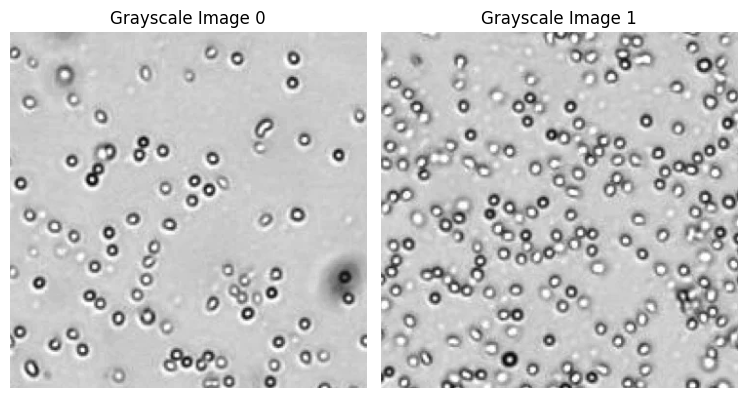

In [27]:
# Plot the grayscale images for visualization
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 4)

for i, img in enumerate(monochrome_images):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Grayscale Image {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### Save the grayscale images

In [28]:
for i, img in enumerate(monochrome_images):
    output_path = f"./grayscale_images/grayscale_image_{i}.png"
    plt.imsave(output_path, img, cmap='gray')

## D2 - Image Normalisation 

Image normalization is a common preprocessing step in image processing. It typically scales the pixel values in an image to a given range (e.g., [0, 255] for grayscale images). 

The formula for image normalization is:

$$
\text{normalized} = \frac{\text{image} - \text{min}}{\text{max} - \text{min}} \times 255
$$

Where:
- image is the original image.
- min and max are the minimum and maximum pixel values in the original image.





**4) Why is Image Normalisation imaportant**

- **Highlighting Relevant Features:** Adjusting the pixel intensity distribution can enhance important features while suppressing noise, aiding in better feature extraction.
- **Consistency Across Datasets:** When combining images from different sources, normalisation ensures that all images have a similar distribution, reducing biases introduced by varying acquisition conditions.

In [29]:

def normalize_image(img):
    """
    Normalize the image to the range [0, 255] without using PIL.
    """
    img_min = img.min()
    img_max = img.max()
    
    normalized_array = ((img - img_min) / (img_max - img_min) * 255).astype(np.uint8)
    
    return normalized_array

# Normalize the images
normalized_images = [normalize_image(img) for img in monochrome_images]



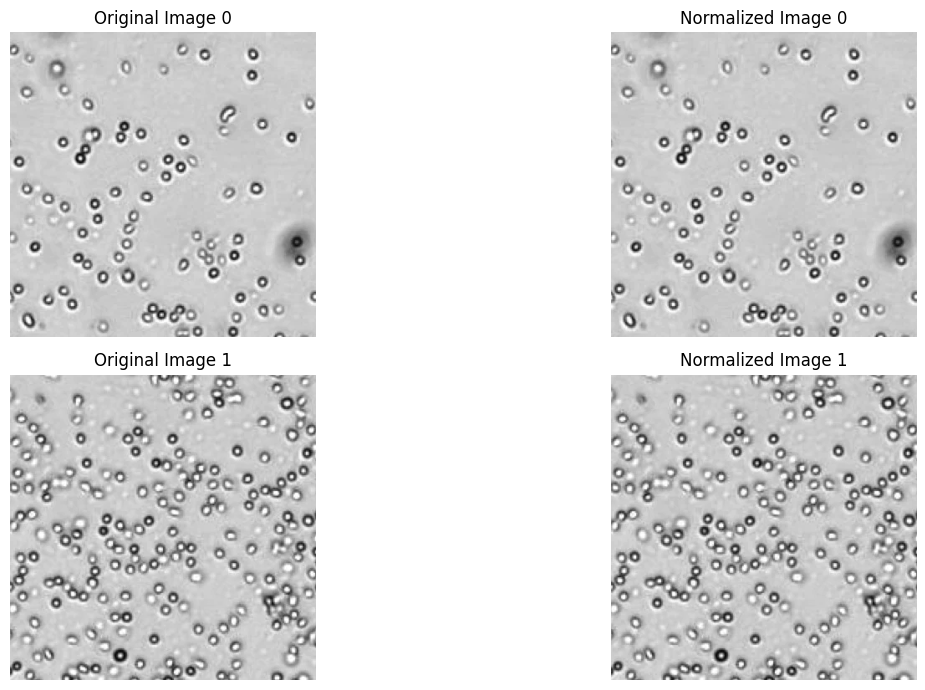

In [31]:
# Plot the normalized images for visualization
# fig = plt.figure(figsize=(15, 15))
# gs = gridspec.GridSpec(1, 4)

# for i, img in enumerate(normalized_images):
#     ax = fig.add_subplot(gs[0, i])
#     ax.imshow(img, cmap='gray')
#     ax.set_title(f"Normalized Image {i}")
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

fig = plt.figure(figsize=(15, 7))
gs = gridspec.GridSpec(2, len(monochrome_images), height_ratios=[1, 1])

for i in range(len(monochrome_images)):
    # Plot original image
    ax_orig = fig.add_subplot(gs[i, 0])
    ax_orig.imshow(monochrome_images[i], cmap='gray')
    ax_orig.set_title(f"Original Image {i}")
    ax_orig.axis('off')
    
    # Plot normalized image
    ax_norm = fig.add_subplot(gs[i, 1])
    ax_norm.imshow(normalized_images[i], cmap='gray')
    ax_norm.set_title(f"Normalized Image {i}")
    ax_norm.axis('off')

plt.tight_layout()
plt.show()

## D3 - Image Denoising
Denoising is an important preprocessing step, especially when dealing with images that might have noise. 


One of the common methods to denoise grayscale images is to use a Gaussian filter, which smoothens the image by replacing each pixel value with a weighted average of the surrounding pixels, where weights are determined by the Gaussian function. 

In [17]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian filtering for denoising
denoised_gaussian_images = [gaussian_filter(img, sigma=1) for img in normalized_images]


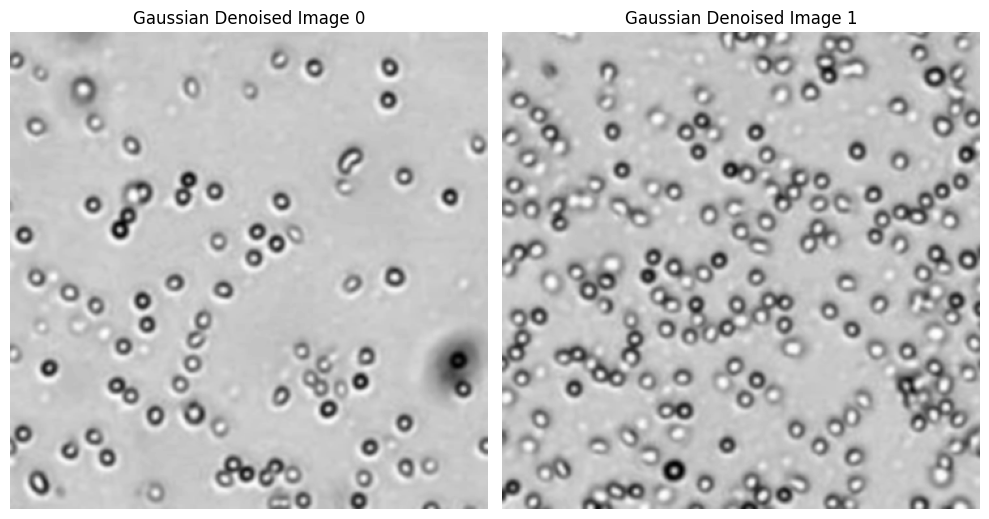

In [18]:
# Plot the denoised images for visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
for i, ax in enumerate(axes):
    ax.imshow(denoised_gaussian_images[i], cmap='gray')
    ax.set_title(f"Gaussian Denoised Image {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### Save the denoised grayscale images images

In [19]:
from skimage import io

for i, img in enumerate(denoised_gaussian_images):
    output_path = f"./grayscale_images_preprocessed/grayscale_image_preprocessed{i}.png"
    io.imsave(output_path, img.astype(np.uint8))  # Saving as grayscale



## D4 - Transform a grayscale image to a black \& white image with *thresholding* (bonus) (Motivation for next week)

A very simple way to segment an image is to distinguish between pixels with intensities in different pre-defined ranges. [Thresholding](https://en.wikipedia.org/wiki/Thresholding_%28image_processing%29) is used to convert continuously colored images into bi-colored images. Pixel value ranges are delimited by *thresholds*, whence the name of the method. Since the cells are darker than the background of the pate, in our case we want to distinguish between darker and lighter areas of the image. This means that we will need a single threshold to do the job.

In our case, defining a threshold = X means that all of the pixels that have an intensity value smaller than X * max_intensity_value_pixel (= X * 255) will become black and the ones having a bigger value will become white.

Below we plot the grayscale images (preprocessed) and the thresholded version of these images.

In [20]:
# Apply thresholding (using a fixed threshold value, e.g., 100)
# Try different threshold
Threshold = 100
Thresholded_images = [(img > Threshold).astype(np.uint8) for img in denoised_gaussian_images]


1 - img > Threshold: 

This is a comparison operation that checks for each pixel in the img array if its value is greater than Threshold. The result of this operation is a boolean array of the same shape as img, where each entry is True if the corresponding pixel value in img is greater than Threshold, and False otherwise. 

2- .astype(np.uint8):

This converts the boolean array resulting from the previous step into an array of type np.uint8 (unsigned 8-bit integer). In this conversion:
True values (from the boolean array) become 1
False values become 0

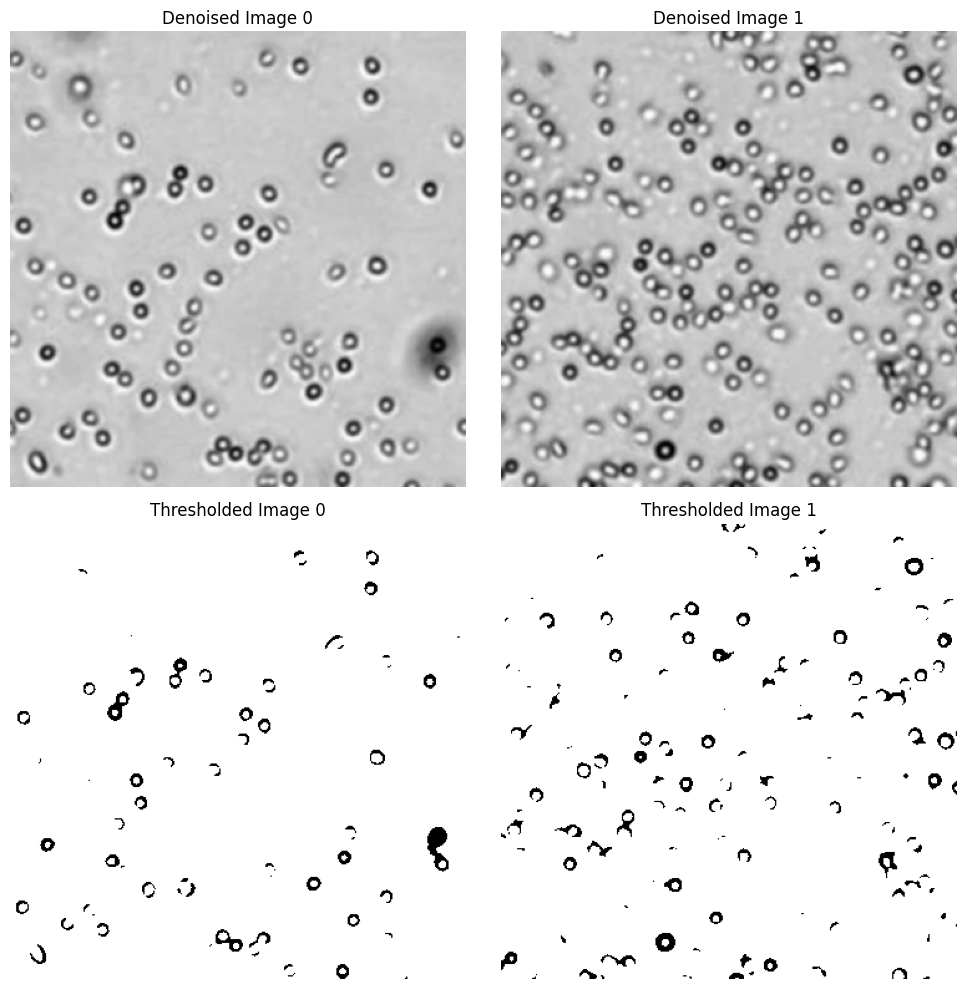

In [21]:
# Plot the denoised images in the first row and the segmented images using thresholding in the second row
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, ax in enumerate(axes[0]):
    ax.imshow(denoised_gaussian_images[i], cmap='gray')
    ax.set_title(f"Denoised Image {i}")
    ax.axis('off')
    
for i, ax in enumerate(axes[1]):
    ax.imshow(Thresholded_images[i], cmap='gray')
    ax.set_title(f"Thresholded Image {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### D4 - Otsu's Thresholding (Bonus)

Automatically determine the best threshold value by maximizing the variance between two classes of pixels.

In [22]:
from skimage.filters import threshold_otsu

# Apply Otsu's thresholding
segmented_images_otsu = []
for img in denoised_gaussian_images:
    thresh = threshold_otsu(img)
    print(thresh)
    binary = img > thresh
    segmented_images_otsu.append(binary)





161
163


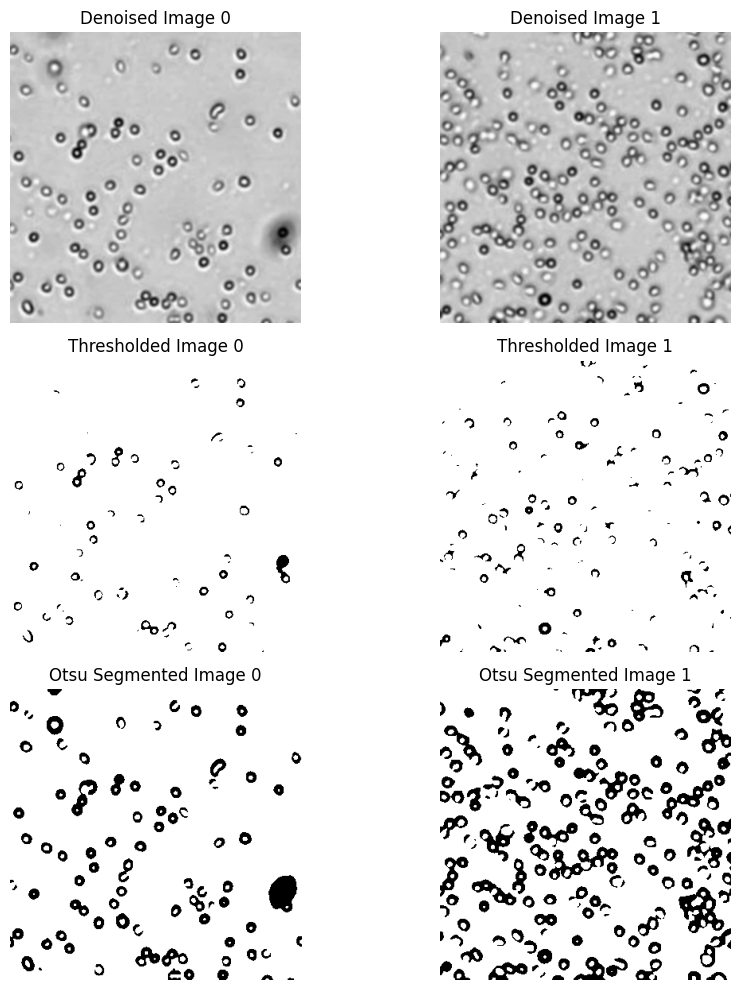

In [23]:
# Plot the segmented images using Otsu's thresholding

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
for i, ax in enumerate(axes[0]):
    ax.imshow(denoised_gaussian_images[i], cmap='gray')
    ax.set_title(f"Denoised Image {i}")
    ax.axis('off')
    
for i, ax in enumerate(axes[1]):
    ax.imshow(Thresholded_images[i], cmap='gray')
    ax.set_title(f"Thresholded Image {i}")
    ax.axis('off')



for i, ax in enumerate(axes[2]):
    ax.imshow(segmented_images_otsu[i], cmap='gray')
    ax.set_title(f"Otsu Segmented Image {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()